In [5]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
spotify_data = pd.read_csv(
    'dataset/spotify-2023-cleaned.csv', encoding='ISO-8859-1')

# Displaying basic information about the dataset
spotify_data_info = spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_id              945 non-null    int64  
 1   track_name            945 non-null    object 
 2   artist_name           945 non-null    object 
 3   artist_count          945 non-null    int64  
 4   released_year         945 non-null    float64
 5   released_month        945 non-null    int64  
 6   released_day          945 non-null    int64  
 7   in_spotify_playlists  945 non-null    int64  
 8   in_spotify_charts     945 non-null    int64  
 9   streams               945 non-null    float64
 10  in_apple_playlists    945 non-null    int64  
 11  in_apple_charts       945 non-null    int64  
 12  in_deezer_playlists   945 non-null    int64  
 13  in_deezer_charts      945 non-null    int64  
 14  in_shazam_charts      945 non-null    float64
 15  bpm                   9

## Feature Distribution

Histograms indicate the spread of audio features like `bpm`, `danceability`, `valence`, etc. across the dataset. Some features like `speechiness` and `instrumentalness` have skewed distributions.

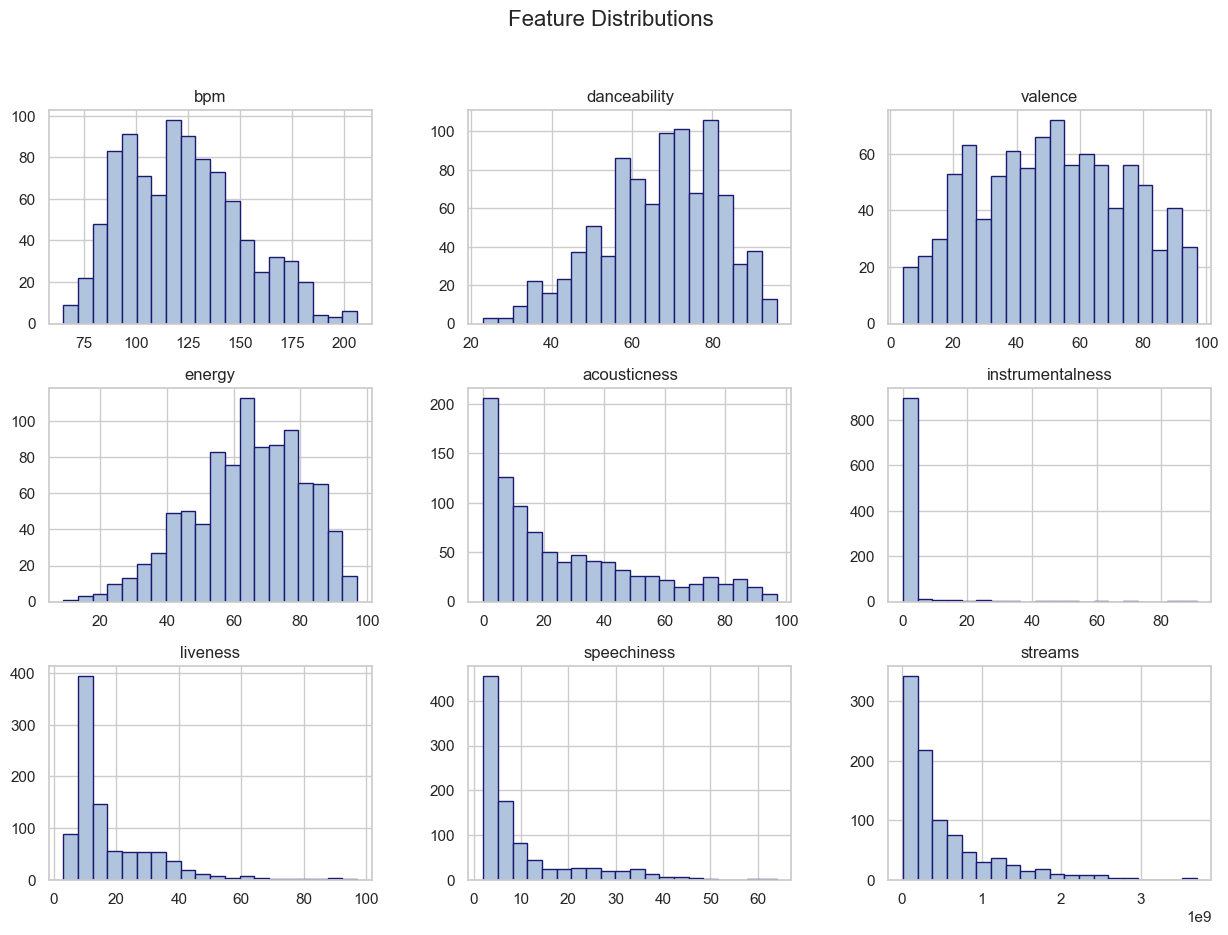

In [6]:
# Set up the plotting style
sns.set_theme(style='whitegrid')

# Select columns for visualization
numerical_features = [
    'bpm', 'danceability', 'valence', 'energy',
    'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams'
]

# Create histograms for numerical features
spotify_data[numerical_features].hist(
    figsize=(15, 10), bins=20, color='lightsteelblue', edgecolor='midnightblue')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

## Correlation Heatmap

High correlations between certain features and `streams` are evident, particularly for features like `energy` and `danceability`.

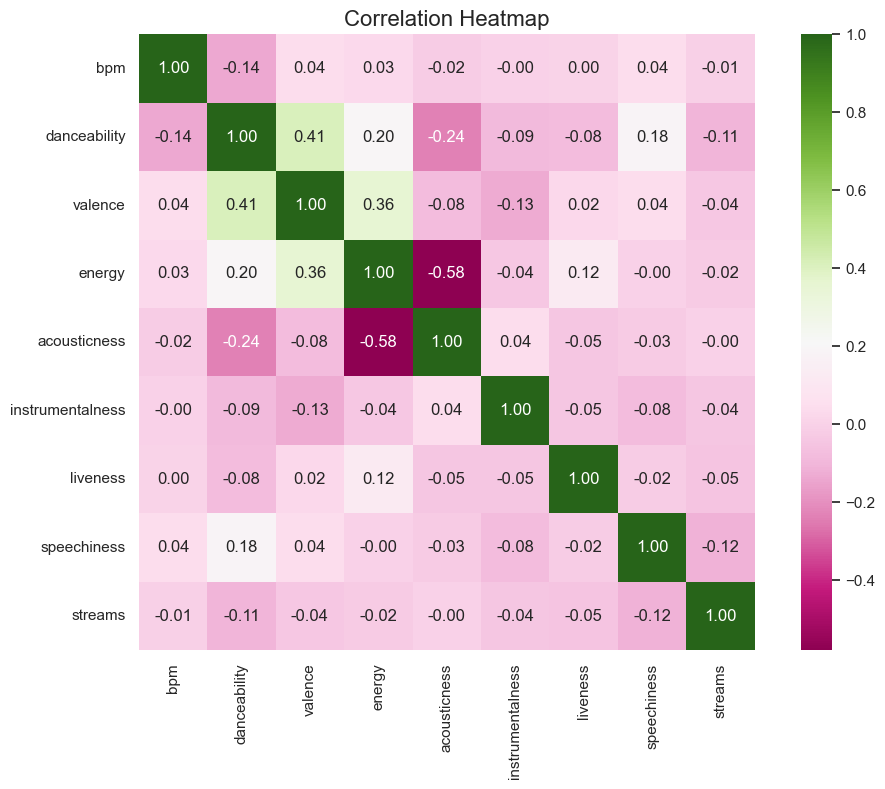

In [7]:
# Correlation heatmap including 'streams'
plt.figure(figsize=(12, 8))
correlation_matrix = spotify_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True,
            fmt='.2f', cmap='PiYG', square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Scatter Plots

Visual relationships between `streams` and features like `energy`, `danceability`, and `acousticness` reveal trends, though some noise is present.

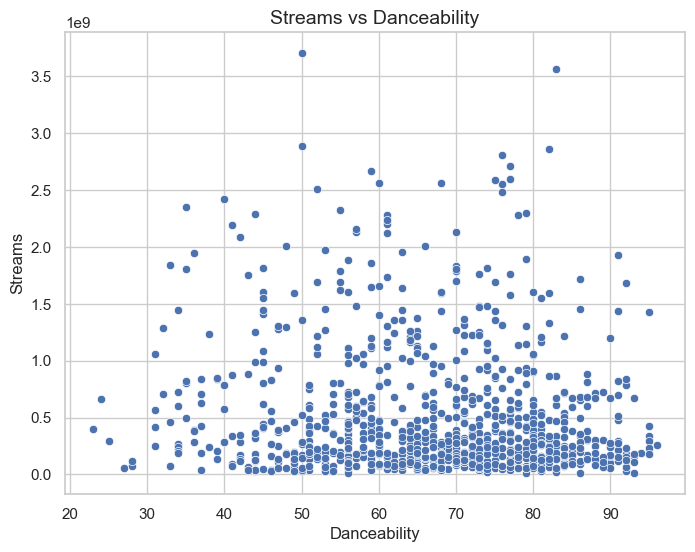

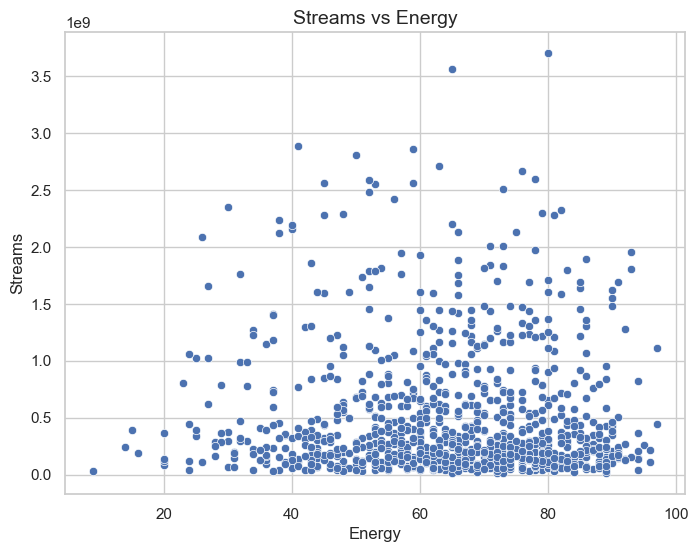

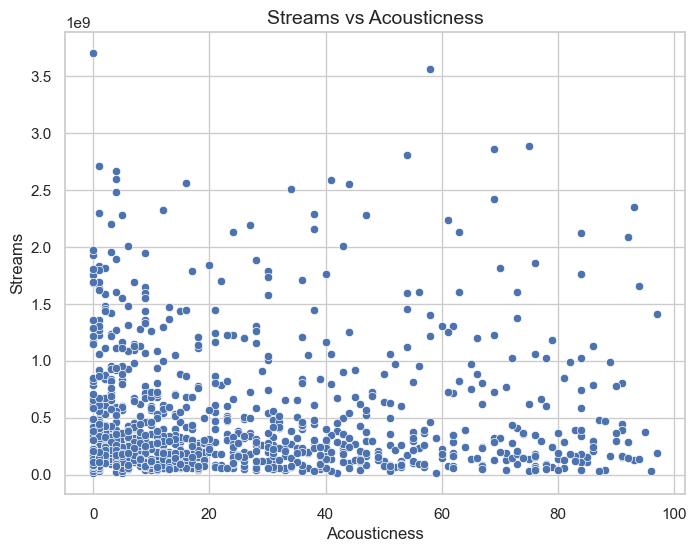

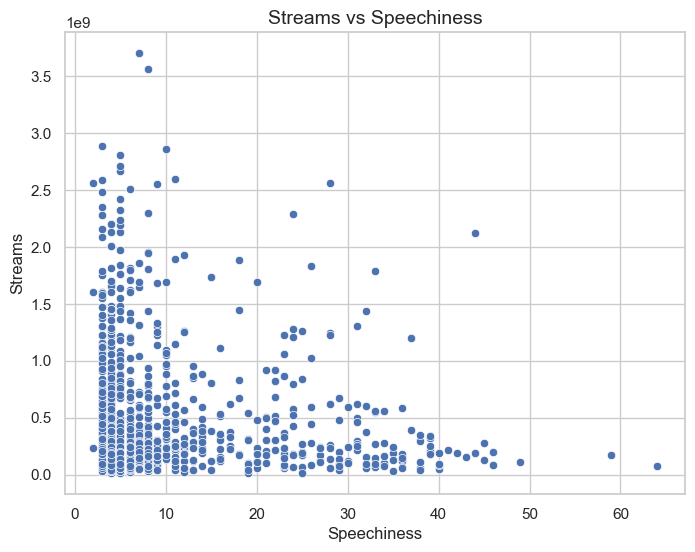

In [8]:
# Scatterplots for 'streams' vs. selected audio features
features_to_plot = ['danceability', 'energy', 'acousticness', 'speechiness']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=spotify_data[feature], y=spotify_data['streams'])
    plt.title(f'Streams vs {feature.capitalize()}', fontsize=14)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Streams')
    plt.show()